Autoreload notebook

In [1]:
%load_ext autoreload
%autoreload 2

>> #### Import required packages

In [2]:
# Import packages

import pandas as pd
import numpy as np
import random
import os

#notebook reproducible 
np.random.seed(42)
random.seed(42)

# Directory listing
from glob import glob

# Visualization
import matplotlib.pylab as plt
import seaborn as sns

# Audio Processing
import librosa
import librosa.display
import IPython.display as ipd

# Color Palettes

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

>> #### Load Amharic audio files

In [3]:
amharic_audio_files = glob("../data/data/train/wav2/*.wav")

In [3]:
amharic_audio_files = glob("../data/AMHARIC/data/train/wav/*.wav")

In [11]:
'tr_10773_tr05141' in amharic_audio_files

False

In [4]:
amharic_audio_files[0]

'../data/AMHARIC/data/train/wav/tr_3321_tr34022.wav'

In [5]:
amharic_audio_files[:5]

['../data/AMHARIC/data/train/wav/tr_3321_tr34022.wav',
 '../data/AMHARIC/data/train/wav/tr_4727_tr48028.wav',
 '../data/AMHARIC/data/train/wav/tr_10487_tr06142.wav',
 '../data/AMHARIC/data/train/wav/tr_10148_tr098110.wav',
 '../data/AMHARIC/data/train/wav/tr_6378_tr64079.wav']

Listen to sample audio files

In [6]:
ipd.Audio(amharic_audio_files[2324])

In [7]:
y, sr = librosa.load(amharic_audio_files[4])

In [8]:
y

array([-0.02164217, -0.02434997, -0.02032852, ..., -0.01848836,
       -0.02154249, -0.01406884], dtype=float32)

In [9]:
sr

22050

<AxesSubplot:title={'center':'Raw Data Sample'}>

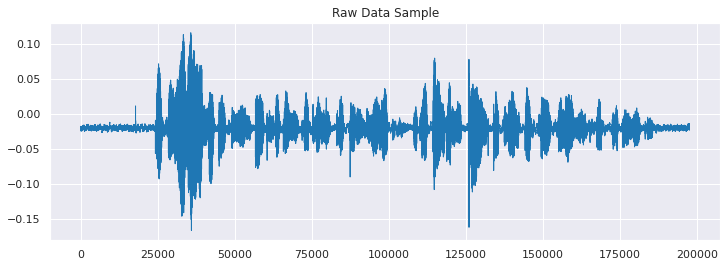

In [10]:
sns.set_style("darkgrid")
pd.Series(y).plot(figsize=(12, 4), lw=1, title="Raw Data Sample", color=color_pal[0])

In [11]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

<AxesSubplot:title={'center':'Raw Data Sample'}>

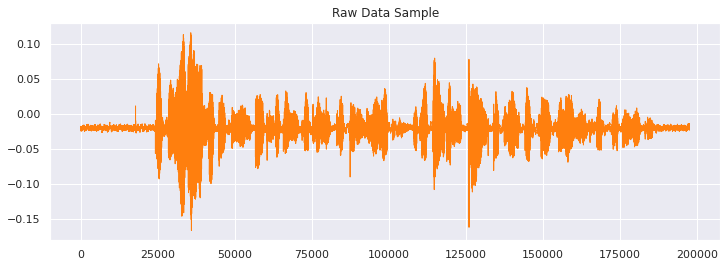

In [12]:
sns.set_style("darkgrid")
pd.Series(y_trimmed).plot(figsize=(12, 4), lw=1, title="Raw Data Sample", color=color_pal[1])

>> ### Load the entire Data

In [35]:
audio_files2 = []

for file in os.listdir('../data/AMHARIC/data/train/wav/'):
    if file.endswith(".wav"):
        audio_files2.append(file)

In [36]:
audio_files2[:5]

['tr_3321_tr34022.wav',
 'tr_4727_tr48028.wav',
 'tr_10487_tr06142.wav',
 'tr_10148_tr098110.wav',
 'tr_6378_tr64079.wav']

In [ ]:
with open('../data/AMHARIC/data/train/text') as tx:
    transcription = tx.readline()

In [60]:
amharic_audio_files = glob("../data/AMHARIC/data/train/wav/*.wav")

In [41]:
audio_files2[:2]

['tr_3321_tr34022.wav', 'tr_4727_tr48028.wav']

In [40]:
'tr_10773_tr05141' in audio_files2

False

In [34]:
'../data/AMHARIC/data/train/wav/tr_10000_tr097082' in amharic_audio_files

False

In [21]:
len(amharic_audio_files)

10875

In [12]:
import json
count = 0
print("Using readlines()")
  
with open("../data/data/train/text2") as fp:
    Lines = fp.readlines()
    
    for line in Lines:
        count += 1
        valid_json = {}
        val = line.split(' ')[1:]
        val = ' '.join(val)
        # Remove any new line character
        val = val.replace("\n", "").strip()
        path = line.split(' ')[0]
        # if path == 'tr_10773_tr05141':
        #   print('Has found the path')

        path = '../data/data/train/wav2/' + path + '.wav'

        if path not in amharic_audio_files:
          # print(path)
          # break
          # if path == 'tr_10773_tr05141':
          #   print('Has found the path IN THE PATH SKIPPINT IT')
          # print(path)
          continue
        # append '../data/AMHARIC/data/train/wav' to the path
        # print(val)
        valid_json['text'] = val
        valid_json['key'] = path
        # GEt the duration of the audio file
        valid_json['duration'] = librosa.get_duration(filename=path)    
        with open('./valid2_corpus.json', 'a', encoding='utf-8') as fp:
          fp.write(json.dumps(valid_json, ensure_ascii=False))
          fp.write("\n")

        # print("Line{}: {}".format(count, line.strip()))
    

Using readlines()


In [4]:
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_generator import make_audio_gen
from train import train
from models import model_2
from char_map import char_map, index_map


TRAIN_CORPUS = "./valid2_corpus.json"
VALID_CORPUS = "./valid2_corpus.json"
# VALID_CORPUS = "data_stbbl/valid_corpus.json"

MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 2
MODEL_NAME = "model_2_stbbl"

################ Reminder MINI_BATCH_SIZE=250 in previous notebooks
MINI_BATCH_SIZE = 7

SORT_BY_DURATION=False
MAX_DURATION = 10.0

audio_gen = make_audio_gen(TRAIN_CORPUS, VALID_CORPUS, spectrogram=False, mfcc_dim=MFCC_DIM,
                           minibatch_size=MINI_BATCH_SIZE, sort_by_duration=SORT_BY_DURATION,
                           max_duration=MAX_DURATION)
# add the training data to the generator
audio_gen.load_train_data()
audio_gen.load_validation_data()

2022-06-07 11:05:27.886423: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-07 11:05:27.928006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 11:05:27.928022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!pip3 install --no-binary=h5py h5py

In [5]:
EPOCHS = 5
MODEL_NAME = "model_2_stbbli"

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=0.4,
                number_of_layers=5,
                output_dim=len(char_map)+1)

train(audio_gen, input_to_softmax=model, model_name=MODEL_NAME, epochs=EPOCHS, minibatch_size=MINI_BATCH_SIZE)

2022-06-07 11:05:34.862219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-07 11:05:34.862264: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 11:05:34.862287: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jedi): /proc/driver/nvidia/version does not exist
2022-06-07 11:05:34.862870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 the_input (InputLayer)      [(None, None, 13)]        0         
                                                                 
 layer_1_conv (Conv1D)       (None, None, 200)         28800     
                                                                 
 conv_batch_norm (BatchNorma  (None, None, 200)        800       
 lization)                                                       
                                                                 
 rnn_1 (GRU)                 (None, None, 250)         339000    
                                                                 
 bt_rnn_1 (BatchNormalizatio  (None, None, 250)        1000      
 n)                                                              
                                                                 
 rnn_2 (GRU)                 (None, None, 250)         376500

/home/jedi/Documents/Tenacademy/Week4/STT/scripts/train.py:69: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=audio_gen.next_train(), steps_per_epoch=steps_per_epoch,


22/22 [==============================] - 38s 1s/step - loss: 287.9402 - val_loss: 228.2561
Epoch 2/5
22/22 [==============================] - 32s 1s/step - loss: 167.1988 - val_loss: 251.6840
Epoch 3/5
22/22 [==============================] - 29s 1s/step - loss: 156.2883 - val_loss: 327.3281
Epoch 4/5
22/22 [==============================] - 35s 2s/step - loss: 152.2860 - val_loss: 173.1155
Epoch 5/5
22/22 [==============================] - 32s 1s/step - loss: 150.0287 - val_loss: 466.9626


In [6]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from char_map import char_map, index_map
from models import model_2

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_2_stbbli"
model.load_weights('models/' + model_name + '.h5')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 the_input (InputLayer)      [(None, None, 13)]        0         
                                                                 
 layer_1_conv (Conv1D)       (None, None, 200)         28800     
                                                                 
 conv_batch_norm (BatchNorma  (None, None, 200)        800       
 lization)                                                       
                                                                 
 rnn_1 (GRU)                 (None, None, 250)         339000    
                                                                 
 bt_rnn_1 (BatchNormalizatio  (None, None, 250)        1000      
 n)                                                              
                                                                 
 rnn_2 (GRU)                 (None, None, 250)         3765

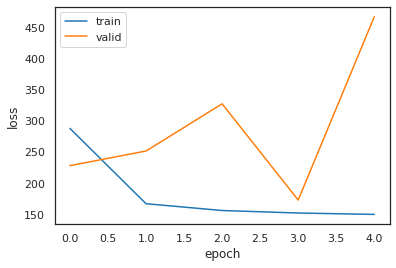

In [7]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot import plot_hist

model_name = "model_2_stbbli"
plot_hist(model_name)

In [9]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from predict import calculate_wer

calculate_wer(model, model_name, audio_gen, 'train', audio_gen.train_length)

TypeError: 'method' object cannot be interpreted as an integer

In [12]:
import numpy as np
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from predict import load_wer

wer = load_wer(model_name, 'validation')
print("WER mean=%f std=%f" % (np.std(wer), np.mean(wer)))

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_2_stbbl_validation_wer.pickle'

In [8]:
import numpy as np
import pickle
from predict import predict

predict(audio_gen, 0, 'train', model)
predict(audio_gen, 1, 'train', model)
predict(audio_gen, 2, 'train', model)
predict(audio_gen, 3, 'train', model)
predict(audio_gen, 4, 'train', model)
predict(audio_gen, 5, 'train', model)
predict(audio_gen, 8, 'train', model)
predict(audio_gen, 11, 'train', model)
predict(audio_gen, 26, 'train', model)
predict(audio_gen, 28, 'train', model)

1/1 [==============================] - 1s 772ms/step


Truth: የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም
Predicted: ሀዎሀሞሀኖሀደሀዬዎሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀዎሀሞሀሞሀሞሀሞሀሞሀሞሀሎ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 193
1/1 [==============================] - 1s 749ms/step


Truth: የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ
Predicted: ሀዎቲሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሩሀሞሀሞሀሞሀ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 38
1/1 [==============================] - 0s 129ms/step


Truth: ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል
Predicted: ሀሞሀሞሀሞሀሞሀኖሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀ'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 46
1/1 [==============================] - 0s 193ms/step


Truth: እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ
Predicted: ሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀዬሀሞሀዎሀሞሀሞሀሞሀ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 42
1/1 [==============================] - 0s 128ms/step


Truth: ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ
Predicted: ሀቲሀሞሀሞሀኖሀሞሀሞሀሞሀሞሀሞሀሩሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሎ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 39
1/1 [==============================] - 0s 144ms/step


Truth: ድንቹ በ ደንብ ስለተኰተኰተ በ ጥሩ ሁኔታ ኰረተ
Predicted: ሀዎሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሎ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 72
1/1 [==============================] - 0s 163ms/step


Truth: በለጠ ች የ በየነ የ በኩር ልጅ ነች
Predicted: ሀቲሀሞሀሞሀሞሀዬሀዎሀ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 219
1/1 [==============================] - 0s 135ms/step


Truth: እንዲያ መሬት አይ ን ካ ኝ ይል የነበረ ሰው በ ድንገት ቆረቆዘ አይደል
Predicted: ሀዎሀሞሀኖሀሞሀሞሀኖሀኖሀሞሀሞሀሞሀሞሀሞሀዎሀሞሀሎሀሞሀሞሀሞሀሎ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 45
1/1 [==============================] - 0s 122ms/step


Truth: ሰውዬው ሚስቱ ን በጣም እንደሚ ወድ በ ለ ሆሳ ስ ነገራት
Predicted: ሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀሎ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 36
1/1 [==============================] - 0s 110ms/step


Truth: አ በ በ ለ ዶክተሩ ሁለመና ዬን ነው የሚያመ ኝ ብሎ ነገረው
Predicted: ሀሞሀሞሀሞሀሞሀሞሀሞሀሞሀዎሀሞሀሞሀዎሀሞሀ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
wer: 225


225